<a href="https://colab.research.google.com/github/Reben80/Data110-22016/blob/main/Week11_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1: John Snow's map

Follow the contents of this notebook and answer all questions (e.g. **Q1: ...**)

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
pump_df = pd.read_csv('https://raw.githubusercontent.com/Reben80/Data110-22016/refs/heads/main/dataset/pumps.csv')

In [36]:
pump_df.head()

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851
2,13.378190,17.394541
3,14.879830,17.809919
4,8.694768,14.905470


You can also sample several rows randomly. If the data is sorted in some ways, sampling may give you a rather unbiased view of the dataset.  

In [8]:
pump_df.sample(5)

,X,Y
4,8.694768,14.905470
8,13.521460,7.958250
9,16.434891,9.252130
2,13.378190,17.394541
6,12.571360,11.727170


You can also figure out the number of rows in the dataset by running

In [9]:
len(pump_df)

13

Note that `df.size` does not give you the number of rows. It tells you the number of elements.

In [10]:
pump_df.size

26

You can also look into the shape of the dataset as well as what are the columns in the dataset.

In [11]:
pump_df.shape  # 13 rows and 2 columns

(13, 2)

In [12]:
pump_df.columns

Index(['X', 'Y'], dtype='object')

You can also check out basic descriptive statistics of the whole dataset by using `describe()` method.  

In [13]:
pump_df.describe()

,X,Y
count,13.000000,13.000000
mean,12.504677,11.963446
std,3.376869,4.957821
min,8.651201,5.046838
25%,8.999440,7.958250
50%,12.571360,11.727170
75%,14.879830,17.394541
max,18.914391,18.517851


You can slice the data like a list

In [14]:
pump_df[:2]

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851


In [15]:
pump_df[-2:]

,X,Y
11,16.00511,5.046838
12,8.99944,5.101023


In [16]:
pump_df[1:5]

,X,Y
1,10.984780,18.517851
2,13.378190,17.394541
3,14.879830,17.809919
4,8.694768,14.905470


or filter rows using some conditions.

In [17]:
pump_df[pump_df.X > 13]

,X,Y
2,13.378190,17.394541
3,14.879830,17.809919
8,13.521460,7.958250
9,16.434891,9.252130
10,18.914391,9.737819
11,16.005110,5.046838


Now let's load another CSV file that documents the cholera deaths. The URL is https://raw.githubusercontent.com/yy/dviz-course/master/data/deaths.csv

**Q2: load the death dataset and inspect it**

1. **load this dataset as `death_df`.**
2. **show the first 2 rows.**
3. **show the total number of rows.**

In [37]:
death_df=pd.read_csv('https://raw.githubusercontent.com/Reben80/Data110-22016/refs/heads/main/dataset/deaths.csv')

## Some visualizations?

Let's visualize them! Pandas actually provides [a nice visualization interface](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) that uses [matplotlib](https://matplotlib.org) under the hood. You can do many basic plots without learning `matplotlib`. So let's try.

<Axes: xlabel='X', ylabel='Y'>

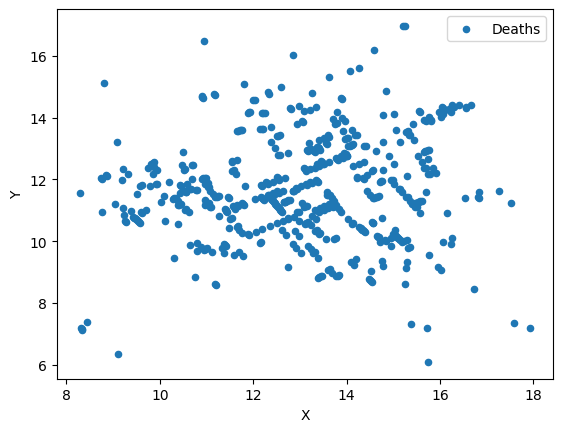

In [38]:
death_df.plot(x='X', y='Y', kind='scatter', label='Deaths')

I think I want to reduce the size of the dots and change the color to black. But it is difficult to find how to do that! It is sometimes quite annoying to figure out how to change how the visualization looks, especially when we use `matplotlib`. Unlike some other advanced tools, `matplotlib` does not provide a very coherent way to adjust your visualizations. That's one of the reasons why there are lots of visualization libraries that *wrap* `matplotlib`. Anyway, this is how you do it.


<Axes: xlabel='X', ylabel='Y'>

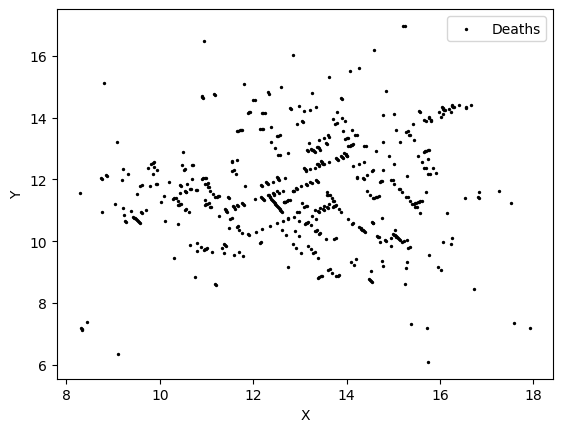

In [20]:
death_df.plot(x='X', y='Y', kind='scatter', label='Deaths', s=2, c='black')

Can we visualize both deaths and pumps?

<Axes: xlabel='X', ylabel='Y'>

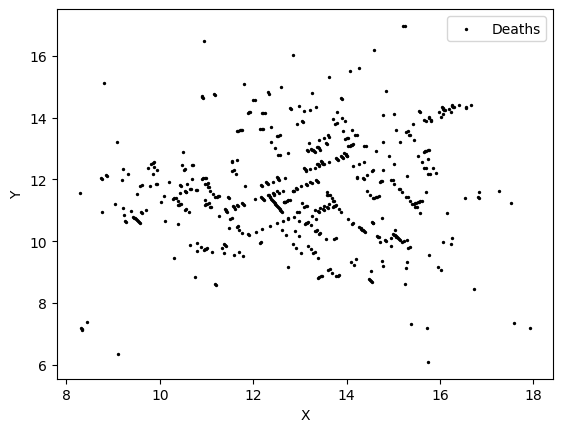

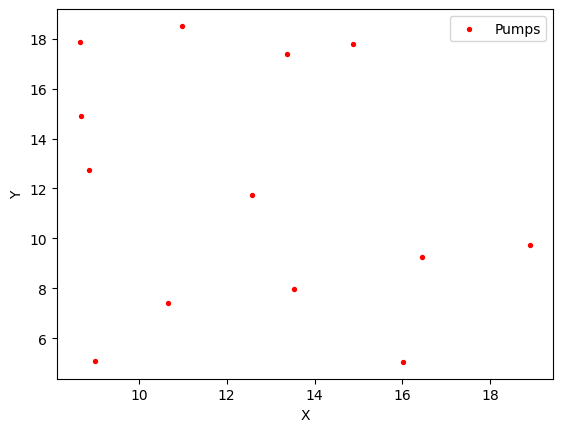

In [21]:
death_df.plot(x='X', y='Y', s=2, c='black', kind='scatter', label='Deaths')
pump_df.plot(x='X', y='Y', kind='scatter', c='red', s=8, label='Pumps')

This object contains all the information and objects in the plot we see. Whatever we want to do with this axes (e.g., changing x or y scale, overlaying other data, changing the color or size of symbols, etc.) can be done by accessing this object.

Then you can pass this axes object to another plot to put both plots in the same axes. Note `ax=ax` in the second plot command. It tells the plot command _where_ to draw the points.

<Axes: xlabel='X', ylabel='Y'>

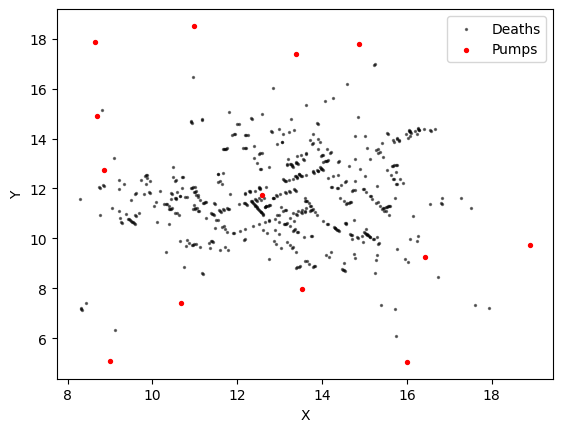

In [23]:
ax = death_df.plot(x='X', y='Y', s=2, c='black', alpha=0.5, kind='scatter', label='Deaths')
pump_df.plot(x='X', y='Y', kind='scatter', c='red', s=8, label='Pumps', ax=ax)

## Voronoi diagram

Let's try the Voronoi diagram. You can use the `scipy.spatial.Voronoi` and `scipy.spatial.voronoi_plot_2d` from `scipy`, the *scientific python* library.

In [25]:
from scipy.spatial import Voronoi, voronoi_plot_2d

Take a look at the documentation of [Voronoi](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html#scipy.spatial.Voronoi) and [voronoi_plot_2d](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.voronoi_plot_2d.html) and

**Q3: produce a Voronoi diagram that shows the deaths, pumps, and voronoi cells**

In [26]:
# you'll need this
points = pump_df.values
points

array([[ 8.6512012, 17.8915997],
       [10.9847803, 18.5178509],
       [13.37819  , 17.3945408],
       [14.8798304, 17.8099194],
       [ 8.694768 , 14.9054699],
       [ 8.8644161, 12.75354  ],
       [12.5713596, 11.72717  ],
       [10.6609697,  7.428647 ],
       [13.5214596,  7.95825  ],
       [16.4348907,  9.2521296],
       [18.9143906,  9.7378187],
       [16.0051098,  5.0468378],
       [ 8.9994402,  5.1010232]])

<Figure size 800x600 with 0 Axes>

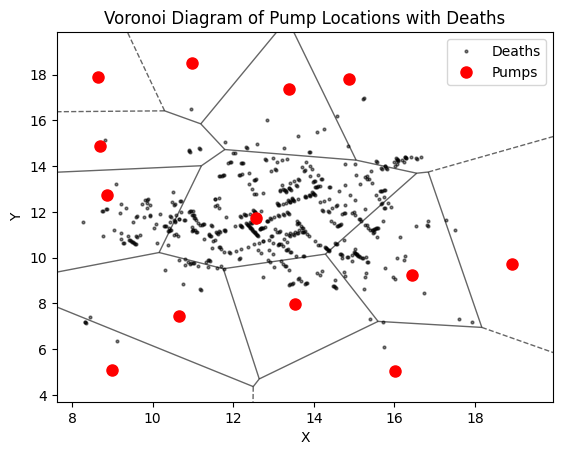

In [33]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Assuming pump_df and death_df are already loaded

# Create the Voronoi diagram
points = pump_df[['X', 'Y']].values  # Select only X and Y columns
vor = Voronoi(points)

# Plot the Voronoi diagram with deaths and pumps
plt.figure(figsize=(8, 6))  # Create a figure with specified size
voronoi_plot_2d(vor, show_vertices=False, line_colors='k', line_width=1, line_alpha=0.6)  # Plot Voronoi diagram
plt.plot(death_df['X'], death_df['Y'], 'o', markersize=2, color='black', alpha=0.5, label='Deaths')  # Plot death locations
plt.plot(pump_df['X'], pump_df['Y'], 'o', markersize=8, color='red', label='Pumps')  # Plot pump locations
plt.title("Voronoi Diagram of Pump Locations with Deaths")  # Add a title
plt.xlabel("X")  # Set x-axis label
plt.ylabel("Y")  # Set y-axis label
plt.legend()  # Show legend
plt.savefig('foo.jpeg')
plt.show()  # Display the plot

## Saving the figure

You can also save your figure into PDF, PNG, etc. If you run the following, the plot will not only be displayed here, but also be saved as `foo.png`.